In [112]:
%pip install datatile --quiet


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [128]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from datatile.summary.df import DataFrameSummary
import seaborn as sns

In [114]:
df_raw_data = pd.read_csv("Dataset/train.csv")

In [115]:
df_raw_data.head(10)
df_raw_data.shape

(1460, 81)

In [116]:
df_raw_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [117]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [118]:
df_raw_data_1 = df_raw_data.loc[:, df_raw_data.columns != "MSZoning"]

In [119]:
summary = df_raw_data.describe()
print(summary)
summary.to_csv("OUTPUT_FILES/Summary.csv")

                Id   MSSubClass  LotFrontage        LotArea  OverallQual   
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  \
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...   
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...  \
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [120]:
import pandas as pd

def dataframe_summary(df):
    summary = pd.DataFrame(columns=['Column', 'Data Type', 'Unique', 'Min', 'Max', 'Mean', 'Median', 'Missing'])
    
    for column in df.columns:
        data_type = df[column].dtype
        
        if pd.api.types.is_numeric_dtype(data_type):
            summary.loc[len(summary)] = [
                column,
                data_type,
                df[column].nunique(),
                df[column].min(),
                df[column].max(),
                df[column].mean(),
                df[column].median(),
                df[column].isnull().sum()
            ]
        else:
            summary.loc[len(summary)] = [
                column,
                data_type,
                df[column].nunique(),
                None,
                None,
                None,
                None,
                df[column].isnull().sum()
            ]
    
    return summary

# Assuming you have a DataFrame called df_raw_data
summary = dataframe_summary(df_raw_data)
summary.to_csv("OUTPUT_FILES/Summary.csv")

In [121]:
def columns_with_missing_values(df, threshold):
    missing_percentages = df.isnull().mean()
    columns_with_missing = missing_percentages[missing_percentages > threshold].index.tolist()
    return columns_with_missing

In [123]:
remove_columns = columns_with_missing_values(df_raw_data, threshold=0.2)
print(remove_columns)

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [125]:
remove_columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'LotFrontage']

In [126]:
df_raw_data = df_raw_data.loc[:, ~df_raw_data.columns.isin(remove_columns)]

In [127]:
# Separate the columns based on their data types
numeric_cols = df_raw_data.select_dtypes(include=['float64', 'int64']).columns
object_cols = df_raw_data.select_dtypes(include=['object']).columns

In [129]:
# Impute missing values for numeric columns with median
numeric_imputer = SimpleImputer(strategy='median')
df_raw_data[numeric_cols] = numeric_imputer.fit_transform(df_raw_data[numeric_cols])

In [130]:
# Impute missing values for object columns with most frequent class
object_imputer = SimpleImputer(strategy='most_frequent')
df_raw_data[object_cols] = object_imputer.fit_transform(df_raw_data[object_cols])

In [131]:
df_raw_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,7917.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,WD,Normal,175000.0
1456,1457.0,20.0,RL,13175.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,WD,Normal,210000.0
1457,1458.0,70.0,RL,9042.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,WD,Normal,266500.0
1458,1459.0,20.0,RL,9717.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,WD,Normal,142125.0


In [132]:
df_raw_data.shape

(1460, 74)

In [133]:
df_raw_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'

In [134]:
df = df_raw_data

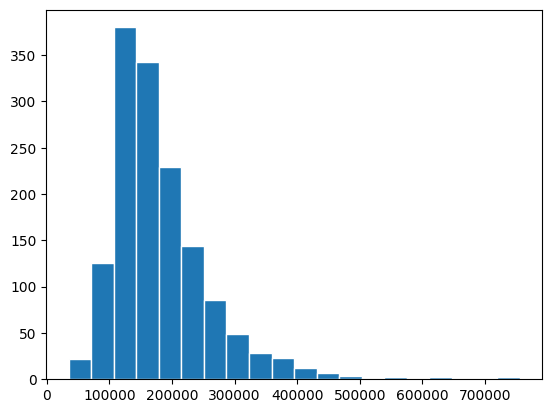

In [135]:
plt.show(plt.hist(df_raw_data['SalePrice'], bins =20, edgecolor='white'))

In [136]:
summary2 = dataframe_summary(df)

In [137]:
summary2

,Column,Data Type,Unique,Min,Max,Mean,Median,Missing
0,Id,float64,1460,1.0,1460.0,730.500000,730.5,0
1,MSSubClass,float64,15,20.0,190.0,56.897260,50.0,0
2,MSZoning,object,5,NaN,NaN,NaN,NaN,0
3,LotArea,float64,1073,1300.0,215245.0,10516.828082,9478.5,0
4,Street,object,2,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
69,MoSold,float64,12,1.0,12.0,6.321918,6.0,0
70,YrSold,float64,5,2006.0,2010.0,2007.815753,2008.0,0
71,SaleType,object,9,NaN,NaN,NaN,NaN,0
72,SaleCondition,object,6,NaN,NaN,NaN,NaN,0


In [138]:
categorical_vars = summary2[summary2["Data Type"]=="object"]["Column"]
categorical_vars = categorical_vars.tolist()
numeric_vars = summary2[summary2["Data Type"]!="object"]["Column"]
numeric_vars = numeric_vars.tolist()

In [139]:
def generate_class_table(dataframe, target_column , categorical_vars):
    class_table = pd.DataFrame(columns=['Column Name', 'Classes', 'Count', 'Percentage', 'Y Mean'])
    for column in categorical_vars:
        classes = dataframe[column].value_counts()
        total_count = classes.sum()
        percentages = (classes / total_count) * 100

        #y_counts = dataframe[dataframe[target_column] == 'Y'][column].value_counts()
        y_means = dataframe.groupby(column)[target_column].mean()
        
        for class_value, count, percentage, y_means in zip(
            classes.index, classes.values, percentages.values, y_means.values
        ):
            data = {
                'Column Name': column,
                'Classes': class_value,
                'Count': count,
                'Percentage': round(percentage, 2),
                'Y Mean': round(y_means, 2)
            }
            class_table = pd.concat([class_table,pd.DataFrame(data, index=[0])])
            class_table.reset_index(drop=True, inplace=True)

    return class_table

In [140]:
summary_1 = generate_class_table(df,"SalePrice",categorical_vars)
summary_1.to_csv("OUTPUT_FILES/categorical_class_means.csv")
summary_1

,Column Name,Classes,Count,Percentage,Y Mean
0,MSZoning,RL,1151,78.84,74528.00
1,MSZoning,RM,218,14.93,214014.06
2,MSZoning,FV,65,4.45,131558.38
3,MSZoning,RH,16,1.10,191004.99
4,MSZoning,C (all),10,0.68,126316.83
...,...,...,...,...,...
225,SaleCondition,Partial,125,8.56,104125.00
226,SaleCondition,Abnorml,101,6.92,167377.42
227,SaleCondition,Family,20,1.37,149600.00
228,SaleCondition,Alloca,12,0.82,175202.22


In [141]:
df.shape

(1460, 74)

In [160]:
categorical_vars_selected = ["MSZoning",
"Street",
"LotShape",
"LandContour",
"LotConfig",
"Neighborhood",
"Condition1",
"BldgType",
"HouseStyle",
"RoofStyle",
"Exterior1st",
"Exterior2nd",
"Foundation",
"Heating",
"CentralAir",
"Electrical",
"GarageType",
"GarageFinish",
"PavedDrive",
"SaleType"]


In [162]:
encoded_data_df = df[categorical_vars_selected]
encoded_data_df = pd.get_dummies(encoded_data_df, columns = categorical_vars_selected)
encoded_data_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,False,False,False,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,False,False,False,True,False,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,True
3,False,False,False,True,False,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,True
4,False,False,False,True,False,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1456,False,False,False,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1457,False,False,False,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1458,False,False,False,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True


In [163]:
encoded_data_df.shape

(1460, 144)

In [164]:
categorical_vars_encoded = encoded_data_df.columns
categorical_vars_encoded = categorical_vars_encoded.tolist()
categorical_vars_encoded

['MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Artery

In [165]:
len(categorical_vars_encoded)

144

In [166]:
mapping_1 = {'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5, 'Av': 3, 'Mn': 2, 'No': 1}
mapping_2 = {'NA':0, 'Unf': 1, 'LwQ': 2, 'Rec': 3,'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
df['ExterQual_map'] = df['ExterQual'].replace(mapping_1)
df['ExterCond_map'] = df['ExterCond'].replace(mapping_1)
df['BsmtQual_map'] = df['BsmtQual'].replace(mapping_1)
df['BsmtExposure_map'] = df['BsmtExposure'].replace(mapping_1)
df['BsmtFinType1_map'] = df['BsmtFinType1'].replace(mapping_1)
df['BsmtCond_map'] = df['BsmtCond'].replace(mapping_1)
df['BsmtExposure_map'] = df['BsmtExposure'].replace(mapping_1)

df['BsmtFinType1_map'] = df['BsmtFinType1'].replace(mapping_2)
df['BsmtFinType2_map'] = df['BsmtFinType2'].replace(mapping_2)

df['HeatingQC_map'] = df['HeatingQC'].replace(mapping_1)
df['KitchenQual_map'] = df['KitchenQual'].replace(mapping_1)
df['GarageQual_map'] = df['GarageQual'].replace(mapping_1)
df['GarageCond_map'] = df['GarageCond'].replace(mapping_1)
#df['PoolQC_map'] = df['Pool QC'].replace(mapping_1)




summary[(summary["Unique"]<20) & (summary["Data Type"]!="object")]

numeric_vars_cat = summary[(summary["Unique"]<20) & (summary["Data Type"]!="object")]["Column"]
numeric_vars_cat = numeric_vars_cat.tolist()
numeric_vars_cat


In [167]:
numeric_vars = summary[(summary["Data Type"]!="object")]["Column"]
numeric_vars = numeric_vars.tolist()
numeric_vars.remove("Id")
numeric_vars.remove("SalePrice")
add_columns = ["ExterQual_map","ExterCond_map","BsmtQual_map","ExterQual_map","BsmtExposure_map","BsmtFinType1_map","BsmtCond_map",
               "BsmtExposure_map","BsmtFinType1_map","BsmtFinType2_map","HeatingQC_map","KitchenQual_map",
               "GarageQual_map","GarageCond_map"]
numeric_vars.extend(add_columns)
numeric_vars


['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'ExterQual_map',
 'ExterCond_map',
 'BsmtQual_map',
 'ExterQual_map',
 'BsmtExposure_map',
 'BsmtFinType1_map',
 'BsmtCond_map',
 'BsmtExposure_map',
 'BsmtFinType1_map',
 'BsmtFinType2_map',
 'HeatingQC_map',
 'KitchenQual_map',
 'GarageQual_map',
 'GarageCond_map']

In [168]:
remove_var = ['MSZoning_C (all)']
for value in remove_var:
    print(value)
    categorical_vars_encoded.remove(value)

MSZoning_C (all)


In [169]:
categorical_vars_encoded

['MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Artery',
 'Condition1_Feedr

In [170]:
all_variables = categorical_vars_encoded
all_variables.extend(numeric_vars)
all_variables

['MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Artery',
 'Condition1_Feedr

In [171]:
len(all_variables)

193

In [172]:
print(all_variables)

['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Con

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [157]:
print(df.shape),print(encoded_data_df.shape)

(1460, 85)
(1460, 198)


(None, None)

In [158]:
df_final_train = pd.concat([df, encoded_data_df], axis = 1)
df_final_train.shape

(1460, 283)

In [ ]:
x_features = [# Categorical encoded variables
              'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 
              'Street_Grvl', 'Street_Pave', 
              'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 
              'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 
              'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 
              'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 
              'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 
              'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 
              'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 
              'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 
              'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 
              'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 
              'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 
              'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 
              'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 
              'Exterior1st_WdShing', 'Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 
              'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 
              'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 
              'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 
              'Heating_Floor', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 
              'CentralAir_N', 'CentralAir_Y', 
              'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 
              'GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf', 
              'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y', 
              'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 
              # Numeric Variables
              'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
              'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
              'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
              'MiscVal', 'MoSold', 'YrSold', 
              # Categorical mapped as numeric - Mostly rating type features
              'ExterQual_map', 'ExterCond_map', 'BsmtQual_map', 'ExterQual_map', 'BsmtExposure_map', 'BsmtFinType1_map', 'BsmtCond_map', 'BsmtExposure_map', 
              'BsmtFinType1_map', 'BsmtFinType2_map', 'HeatingQC_map', 'KitchenQual_map', 'FireplaceQu_map', 'FireplaceQu_map', 'GarageQual_map', 'GarageCond_map']

In [176]:
x_features = ['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 
              'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 
              'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_Corner', 'LotConfig_CulDSac', 
              'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 
              'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 
              'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 
              'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 
              'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 
              'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 
              'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Artery', 
              'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 
              'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_1Fam', 'BldgType_2fmCon', 
              'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 
              'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 
              'HouseStyle_SLvl', 'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 
              'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 
              'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 
              'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 
              'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 
              'Exterior1st_WdShing', 'Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 
              'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 
              'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 
              'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 
              'Exterior2nd_Wd Shng', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 
              'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'Heating_Floor', 'Heating_GasA', 
              'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'CentralAir_N', 'CentralAir_Y', 
              'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 
              'GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 
              'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf', 
              'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 
              'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 
              'MSSubClass', 
              #'LotFrontage', 
              'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
              'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
              'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
              'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
              'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 
              'ExterQual_map', 'ExterCond_map', 'BsmtQual_map', 'ExterQual_map', 'BsmtExposure_map', 
              'BsmtFinType1_map', 'BsmtCond_map', 'BsmtExposure_map', 'BsmtFinType1_map', 'BsmtFinType2_map', 
              'HeatingQC_map', 'KitchenQual_map', 'GarageQual_map', 'GarageCond_map']


In [177]:
xdf = df_final_train[x_features]

In [208]:
# Transpose the DataFrame and drop duplicate rows
df_final_train = df_final_train.T.drop_duplicates().T


In [209]:
df_final_train[['SalePrice']]

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0
...,...
1455,175000.0
1456,210000.0
1457,266500.0
1458,142125.0


In [210]:
ydf = df_final_train[['SalePrice']]


X_train, X_test, y_train, y_test = train_test_split(xdf, ydf, test_size=0.2, random_state=42)
y_true = y_train

In [211]:
X_train

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,BsmtExposure_map,BsmtFinType1_map,BsmtCond_map,BsmtExposure_map,BsmtFinType1_map,BsmtFinType2_map,HeatingQC_map,KitchenQual_map,GarageQual_map,GarageCond_map
254,False,False,True,False,False,True,False,False,False,True,...,1,3,3,1,3,1,3,3,3,3
1066,False,False,True,False,False,True,True,False,False,False,...,1,1,3,1,1,1,4,3,3,3
638,False,False,True,False,False,True,False,False,False,True,...,1,1,3,1,1,1,4,3,3,3
799,False,False,True,False,False,True,False,False,False,True,...,1,5,3,1,5,1,5,4,3,3
380,False,False,True,False,False,True,False,False,False,True,...,1,2,3,1,2,1,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,False,False,True,False,False,True,True,False,False,False,...,1,6,3,1,6,1,4,4,3,3
1130,False,False,True,False,False,True,False,False,False,True,...,1,4,3,1,4,1,3,4,3,3
1294,False,False,True,False,False,True,False,False,False,True,...,1,3,3,1,3,1,3,3,3,3
860,False,False,True,False,False,True,False,False,False,True,...,1,1,3,1,1,1,4,4,3,3


In [212]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [213]:
# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", model.coef_)     # Coefficients (slopes)
print("Intercept:", model.intercept_)   # Intercept (y-intercept)

Coefficients: [[ 2.24460644e+04  2.39440114e+04  1.74948052e+04  2.02323858e+04
  -3.58373297e+03  3.58373297e+03  4.51489031e+03  1.73793544e+04
  -2.77820176e+04  5.88777294e+03 -1.50639298e+04  1.56599997e+04
   5.51987046e+02 -1.14805694e+03  3.38078338e+03  1.80814601e+04
  -3.49074421e+03 -2.22542712e+04  4.28277200e+03 -1.20613879e+03
  -7.73690725e+03  8.51197226e+03 -3.58728888e+03 -8.03950201e+03
  -9.36733520e+03  8.34682116e+03 -2.08344937e+04 -1.60709323e+04
  -1.57473453e+04 -7.49090450e+03 -1.54315941e+04 -1.45295412e+04
   2.17404212e+04 -1.39859777e+04  3.14377734e+04  4.33826395e+04
  -1.76113761e+04 -1.34808299e+04 -8.56156261e+03 -6.07277959e+03
   7.55684228e+03  5.08768931e+04 -8.02471418e+03  1.59258607e+04
   4.49341397e+02 -3.78801720e+03  9.06176904e+03  3.12739583e+03
  -1.09555471e+04 -1.68140733e+04  9.18342787e+03  1.08526364e+04
  -1.11693288e+03  1.78198572e+04  1.23619375e+04  9.15118016e+03
  -2.16230832e+04 -1.77098916e+04 -1.47291979e+03  1.48750821e

In [214]:
# Print the equation
equation = f"y = {intercept}"
for i, coefficient in enumerate(coefficients[0]):
    equation += f" + {coefficient}*{x_features[i]}"

print(f"Equation: {equation}")

IndexError: list index out of range

In [215]:


# Predict the target variable for new data points
y_pred = model.predict(X_train)

print("Predicted y:", y_pred)

Predicted y: [[133043.83812115]
 [171955.19055786]
 [ 82130.88310065]
 ...
 [125695.83646651]
 [181363.59797088]
 [188701.77965047]]


In [216]:
print(len(y_true))
print(len(y_pred))

1168
1168


In [217]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have already fit the model and obtained predictions

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_true, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_true, y_pred, squared=False)

# Calculate R-squared (R2) score
r2 = r2_score(y_true, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 16890.3139233419
Mean Squared Error (MSE): 686943110.3482854
Root Mean Squared Error (RMSE): 26209.599583898365
R-squared (R2) Score: 0.8848290203603382


In [218]:
y_true_test = y_test
y_pred_test = model.predict(X_test)

In [219]:
print(f"MIN: {min(y_pred_test)}")
print(f"MAX: {max(y_pred_test)}")
print(f"MEAN: {np.mean(y_pred_test)}")
print(f"MEDIAN: {np.median(y_pred_test)}")

MIN: [43421.30552922]
MAX: [478464.34044898]
MEAN: 176869.3912919413
MEDIAN: 155824.38004863565


In [220]:
print(len(y_true_test))
print(len(y_pred_test))

292
292


In [221]:
# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_true_test, y_pred_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_true_test, y_pred_test)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_true_test, y_pred_test, squared=False)

# Calculate R-squared (R2) score
r2 = r2_score(y_true_test, y_pred_test)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 20970.325440395656
Mean Squared Error (MSE): 1105904097.5989637
Root Mean Squared Error (RMSE): 33255.13640926712
R-squared (R2) Score: 0.8558204608608787
